### **Problem Statement**

Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
# !pip install openpyxl

In [3]:
df = pd.read_excel("healthCare_Dataset.xlsx")

In [4]:
# Displaying all the rows in the df
pd.set_option('display.max_rows', None)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Preliminary Analysis
### Structure of the DataFrame

In [6]:
print("Shape = {}".format(df.shape))
print("Size = {}".format(df.size))

Shape = (303, 14)
Size = 4242


### Finding the number of missing values in the DataFrame

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Finding Duplicated Rows

In [8]:
duplicate_row = df[df.duplicated()]  
duplicate_row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Removing Duplicated Rows

In [9]:
df.drop_duplicates(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Displaying the summary statistics for numerical columns in our DataFrame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
# df.describe()
summary = df.describe(include= 'all')
summary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Common measures of spread
#### 1.Range
#### 2.Interquartile Range (IQR)
#### 3.Standard Deviation
#### 4.Variance

In [12]:
std_deviation = summary.loc['std']
print(f"\nThe standard deviation of each column of the dataframe are\n\n{std_deviation}")



The standard deviation of each column of the dataframe are

age          9.047970
sex          0.466426
cp           1.032044
trestbps    17.563394
chol        51.753489
fbs          0.356686
restecg      0.526027
thalach     22.903527
exang        0.470196
oldpeak      1.161452
slope        0.616274
ca           1.006748
thal         0.613026
target       0.498970
Name: std, dtype: float64


In [13]:
variance = std_deviation**2
print(f"\nThe variations of each column of the dataframe are\n\n{variance}")


The variations of each column of the dataframe are

age           81.865757
sex            0.217553
cp             1.065114
trestbps     308.472817
chol        2678.423588
fbs            0.127225
restecg        0.276705
thalach      524.571561
exang          0.221084
oldpeak        1.348971
slope          0.379794
ca             1.013542
thal           0.375800
target         0.248971
Name: std, dtype: float64


### Measures of Central Tendency
#### The 3 measures of central tendency are mean, median, mode.

In [14]:
print(f"\nThe means of each column are\n\n{df.mean()}")


The means of each column are

age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64


In [15]:
print(f"\nThe medians of each column are\n\n{df.median()}")


The medians of each column are

age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64


In [16]:
from scipy import stats
print(f"\nThe mode of each column are\n\n{stats.mode(df)}")



The mode of each column are

ModeResult(mode=array([[ 58.,   1.,   0., 120., 197.,   0.,   1., 162.,   0.,   0.,   2.,
          0.,   2.,   1.]]), count=array([[ 19, 206, 143,  37,   6, 257, 151,  11, 203,  98, 141, 175, 165,
        164]]))


### Identifying categorical variables

In [17]:
df.select_dtypes(include='object').columns.to_list()

[]

### Plot histogram and heat map for data exploration

<Axes: >

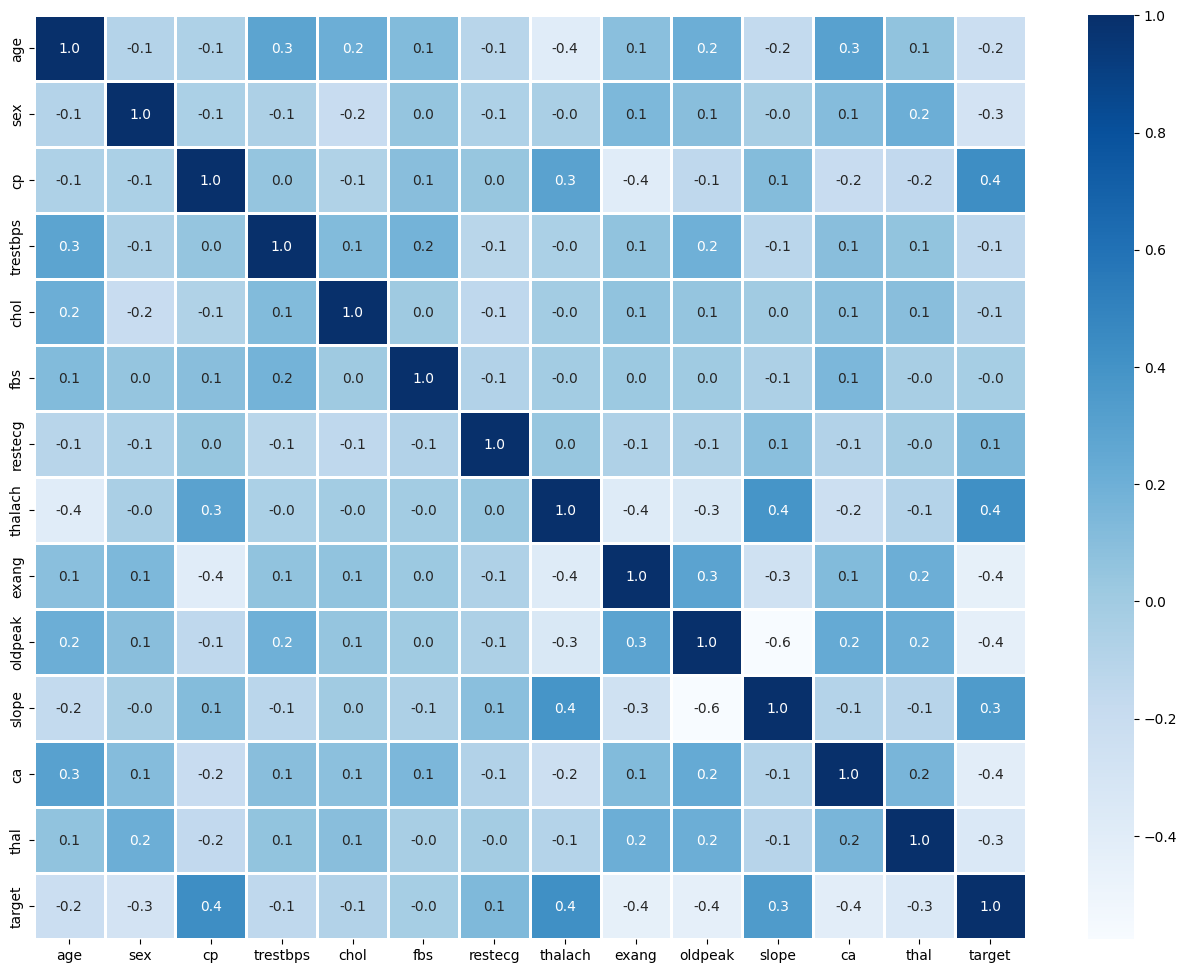

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True, fmt='.1f', linecolor='white',linewidths= 1.001,cmap='Blues')

In [19]:
# Annotating positive and negative value on bar chart

# ax=df.corr()['target'].plot.bar(figsize=(10,10))
# sns.set_style("dark")

# for p in ax.patches: # set data point labels
#     ax.annotate(format(p.get_height(), '.1f'),
#                 (p.get_x() + 0.2, max(p.get_height(), 0)+0.02))
                
                

# ax.axhline(y=0.0, color='black', linestyle='-', linewidth=2)

# sns.heatmap(df.corr()[['target']].sort_values(by='target'),linewidths=1,annot = True,cmap='coolwarm'))



### Study the composition of all patients with respect to the **Sex** category

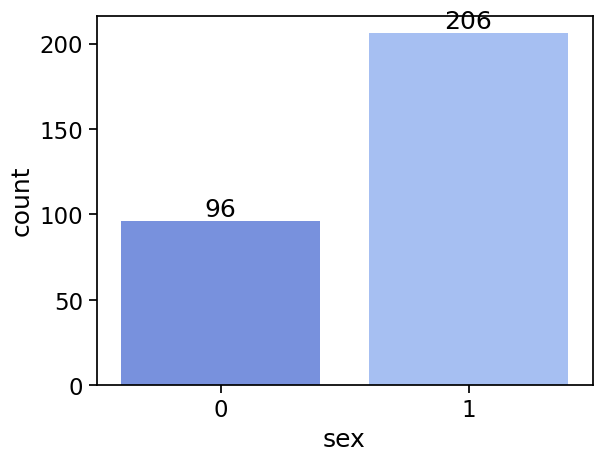

In [20]:
#female-->0
#male-->1
sns.set_context('notebook',font_scale = 1.5)
x=sns.countplot(x=df.sex, data=df, palette=sns.color_palette("coolwarm"))
x.bar_label(x.containers[0]);

### Study the occurrence of CVD across the **Age** category

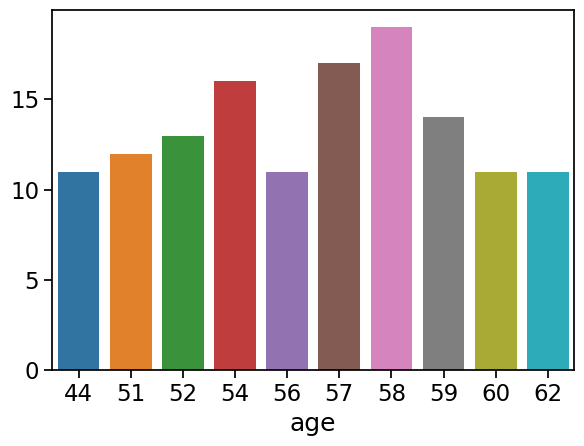

In [21]:
# plt.figure(figsize=(25,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.tight_layout()

Inference:  Here we can see that the 58 age column has the highest frequency.


### Studying if one can detect heart attacks based on anomalies in the **resting blood pressure (trestbps)** of a patient


In [22]:
# Creating a new dataframe with cvd: False
cvd_false = df.loc[df.target == 0]
cvd_true = df.loc[df.target == 1]

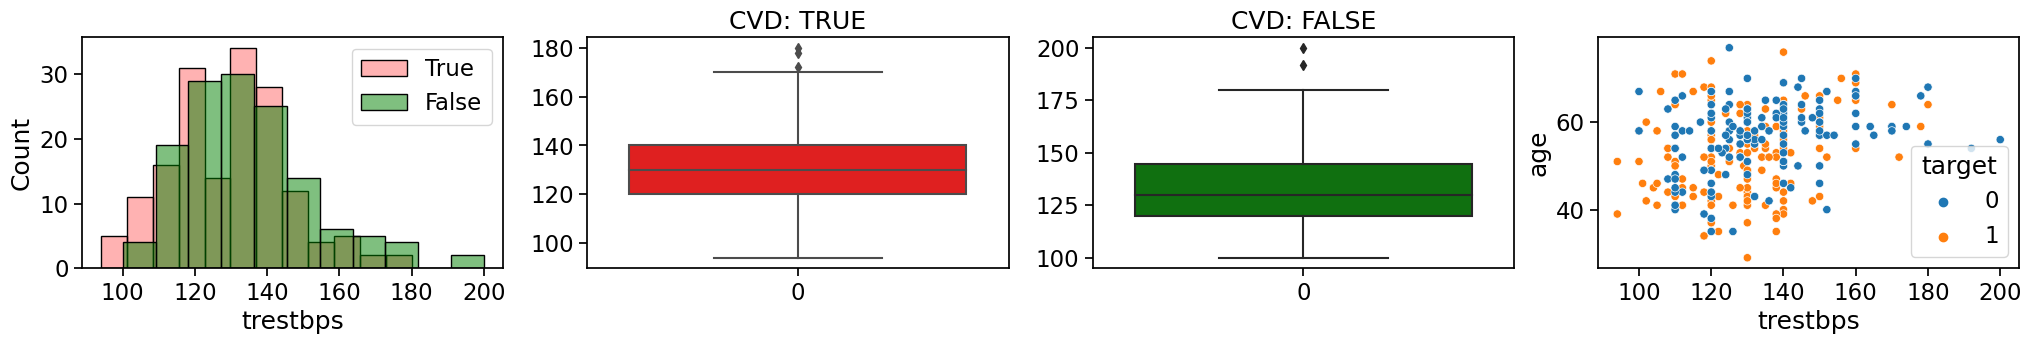

In [23]:
# PLOTTING SUBPLOT_1
plt.figure(figsize=(25,3))
plt.subplot(1,4,1)
sns.histplot(cvd_true.trestbps,color='red',alpha=0.3, label='True')
sns.histplot(cvd_false.trestbps,color='green',alpha=0.5,label='False')
plt.legend()

# PLOTTING SUBPLOT_2
plt.subplot(1,4,2)
sns.boxplot(cvd_true.trestbps.values,color='red')
plt.title("CVD: TRUE")

# PLOTTING SUBPLOT_3
plt.subplot(1,4,3)
sns.boxplot(cvd_false.trestbps.values,color='green')
plt.title("CVD: FALSE")

plt.subplot(1,4,4)
sns.scatterplot(y=df.age, x=df.trestbps,hue=df.target)
plt.show()

We observe that people who develop CVD have lower resting bp than people who don't develop CVD, and most develop in the age around 40 - 65

### Describing the relationship between **cholesterol levels** and a **target variable**

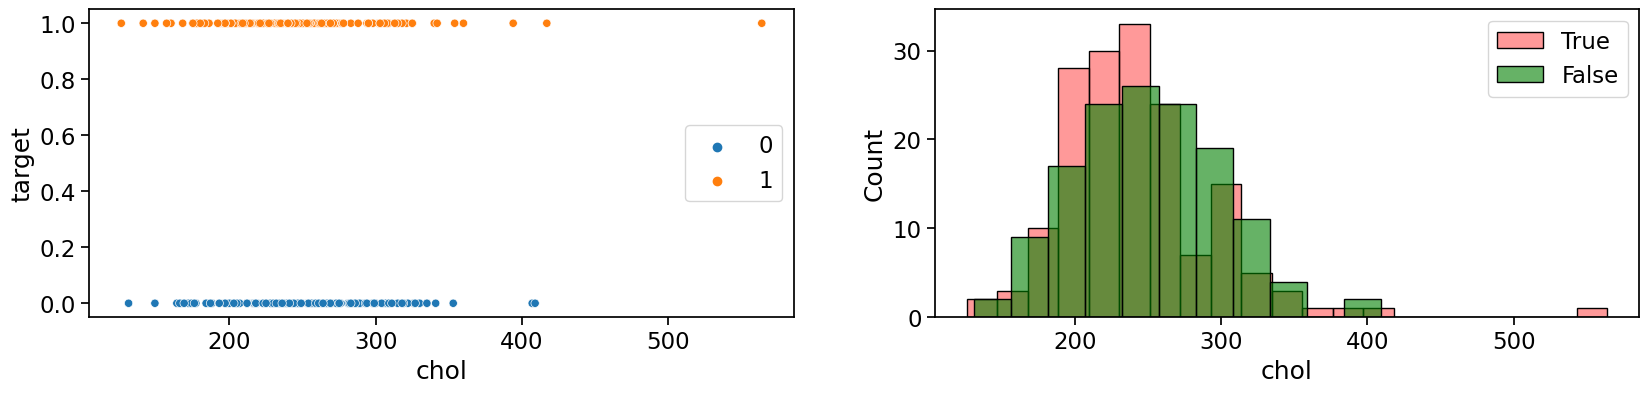

In [24]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.scatterplot(x=df.chol, y=df.target, hue=df.target)
plt.legend(loc='center right')

plt.subplot(122)
sns.histplot(cvd_true.chol, color='r',alpha=0.4,label='True')
sns.histplot(cvd_false.chol, color='green',alpha=0.6,label='False')
plt.legend()

### State what relationship exists between peak exercising and the occurrence of a heart attack


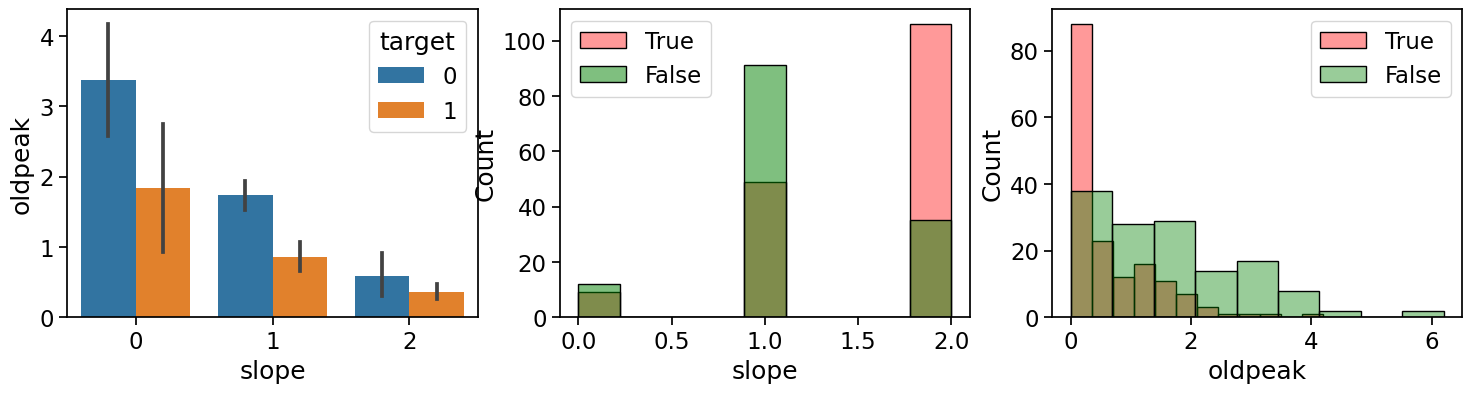

In [25]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.barplot(y=df.oldpeak, x=df.slope, hue=df.target)
plt.subplot(1,3,2)
sns.histplot(cvd_true.slope,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.slope,color='green',alpha=0.5,label='False')
plt.legend()
plt.subplot(1,3,3)
sns.histplot(cvd_true.oldpeak,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.oldpeak,color='green',alpha=0.4,label='False')
plt.legend()

**oldpeak** is lower in people who developed CVD, **slope:2** was highest

### Check if thalassemia is a major cause of CVD


<Axes: xlabel='thal', ylabel='count'>

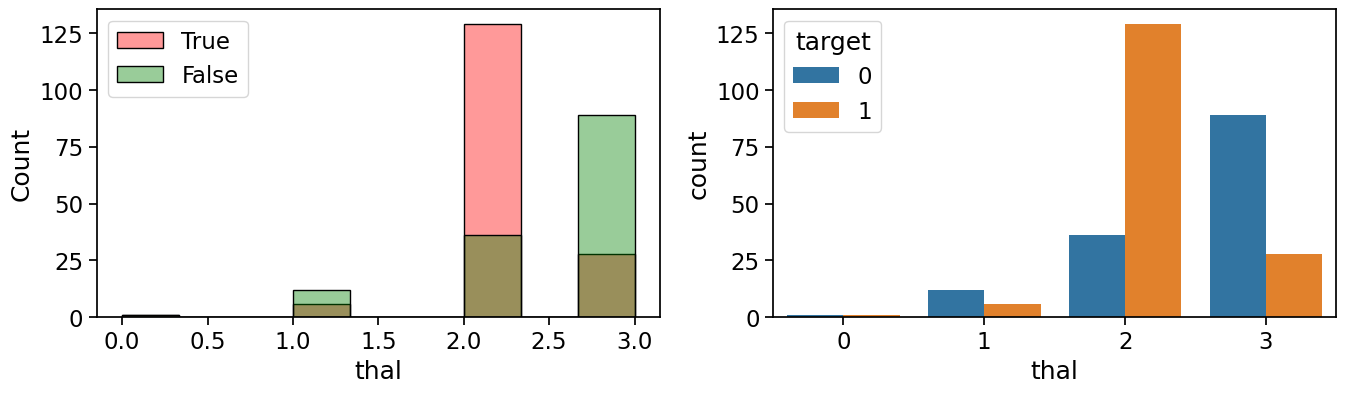

In [26]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.histplot(cvd_true.thal,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.thal,color='green',alpha=0.4,label='False')
plt.legend()
plt.subplot(1,2,2)
sns.countplot(x= df.thal,hue=df.target)

Thalassemia can be a major cause in CVD as it is seen in more number in 2

### Use a pair plot to understand the relationship between all the given variables

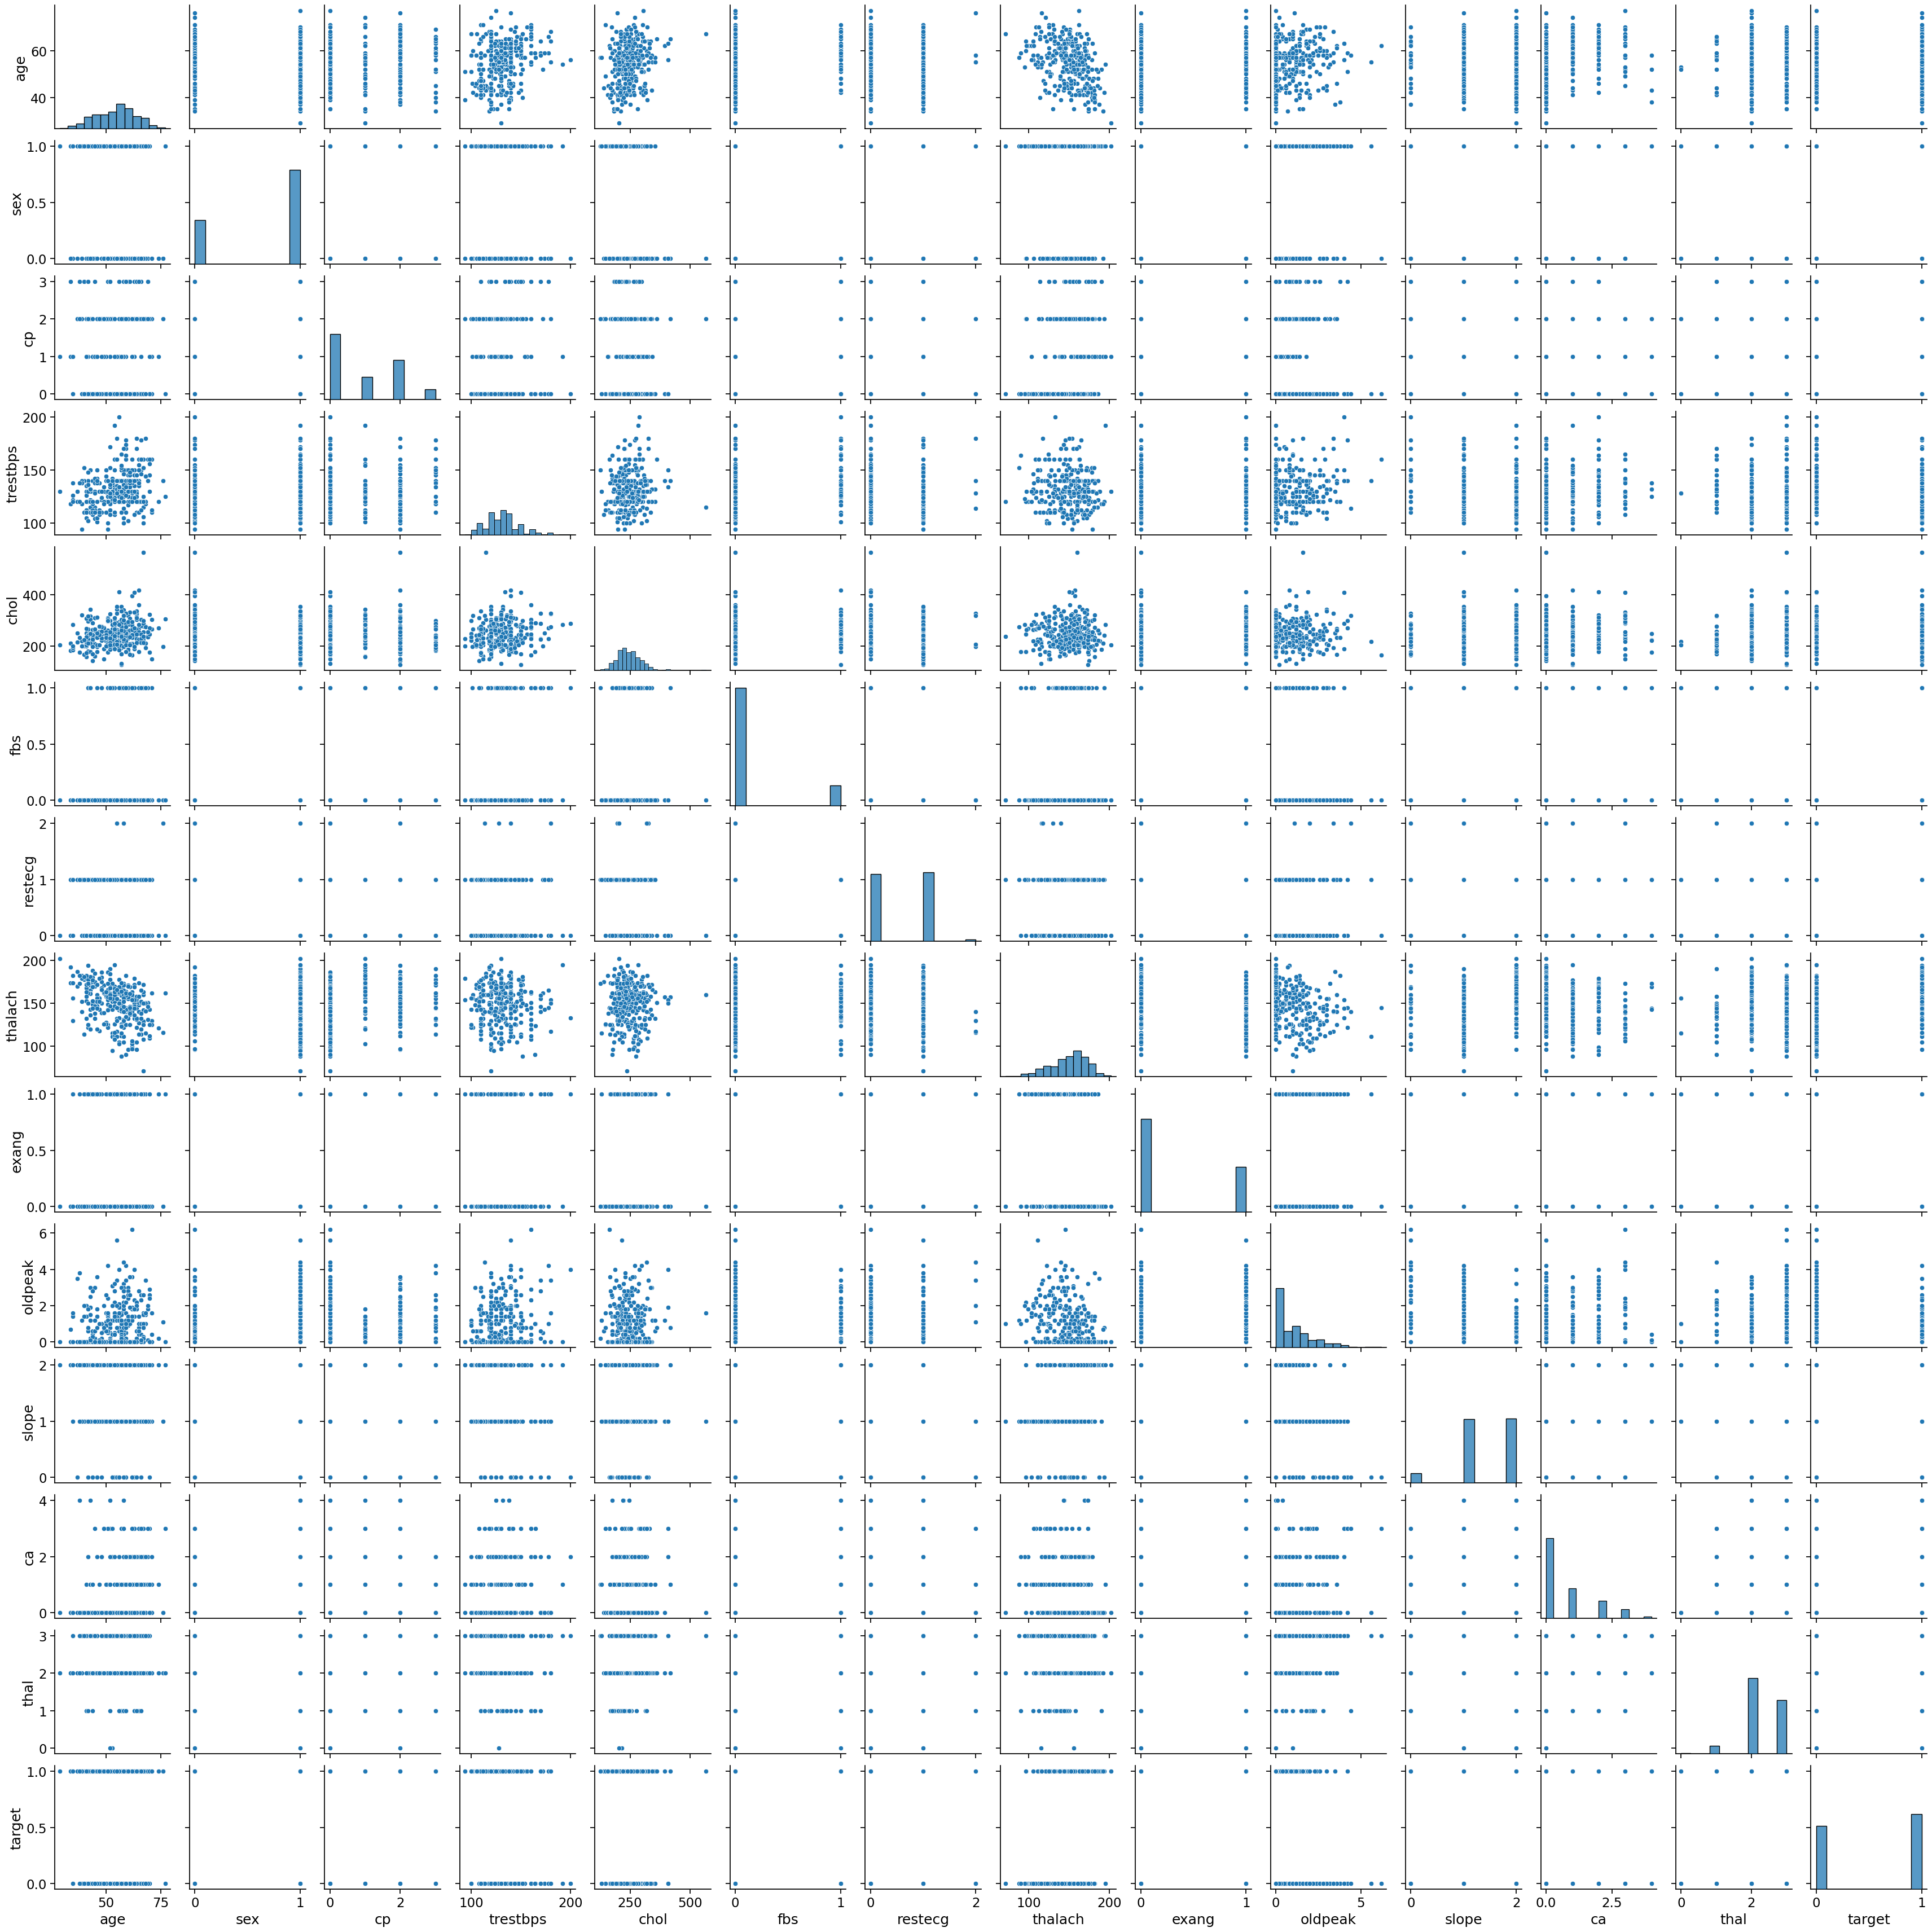

In [27]:
sns.pairplot(data=df)

### **Build a baseline model to predict the risk of a heart attack using a logistic regression** 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [29]:
lr = LogisticRegression()

In [30]:
# Splitting the data into train and test
x = df.drop(['target'],axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3)

print('x_train:',x_train.shape)
print('x_test :',x_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

x_train: (211, 13)
x_test : (91, 13)
y_train: (211,)
y_test : (91,)


In [31]:
#Fit the model in train and test data
lr.fit(x_train,y_train).score(x_train,y_train)


0.8530805687203792

##### The accuracy score is 85%

In [32]:
#Now fitting the model in test set
y_pred = lr.predict(x_test)

##### Confusion Matrix

Accuracy score: 0.8571428571428571
Precision score: 0.8888888888888888
Recall score: 0.8727272727272727


<Axes: >

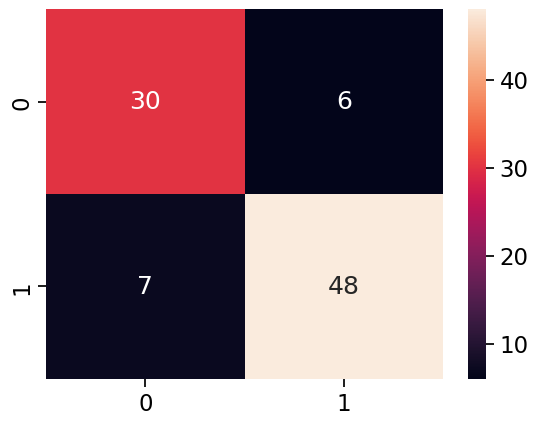

In [33]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Accuracy score: {accuracy}")

precision = metrics.precision_score(y_test,y_pred)
print(f"Precision score: {precision}")

recall = metrics.recall_score(y_test,y_pred)
print(f"Recall score: {recall}")

cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

##### The model has a **85% accuracy score**, an **88% precision score**, and an **87% recall score**, indicating that it works effectively. 

### **Model Comparison with Random Forest Classifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(random_state=5)
cv_score = cross_val_score(rfc,x,y, cv=5)
print(f"The cross-validated accuracy score is {cv_score}")
avg_score = cv_score.mean()
print(f" The average score is {avg_score}")

The cross-validated accuracy score is [0.83606557 0.8852459  0.83333333 0.78333333 0.75      ]
 The average score is 0.8175956284153006


#### The average score is 81%

### Conclusion

From the results, we can see that Logistic Regression model has done better than the Random Forest Classifier for this particular dataset. So, we will shortlist the Logistic Regression model for this project.